# Tutorial: Machine Learning in scikit-learn
*From the [Sebastian Raschka](https://github.com/rasbt/pattern_classification) the GitHub repository [pattern_classification](https://github.com/rasbt/pattern_classification)*

![Machine learning](images/01_robot.png)

<br>
<br>

# About Feature Scaling: Z-Score Standardization and Min-Max Scaling 

<br>
<br>

## Sections

- [About standardization](#About-standardization)
- [About Min-Max scaling / "normalization"](#About-Min-Max-scaling-normalization)
- [Standardization or Min-Max scaling?](#Standardization-or-Min-Max-scaling?)
- [Standardizing and normalizing - how it can be done using scikit-learn](#Standardizing-and-normalizing---how-it-can-be-done-using-scikit-learn)
- [Bottom-up approaches](#Bottom-up-approaches)
- [The effect of standardization on PCA in a pattern classification task](#The-effect-of-standardization-on-PCA-in-a-pattern-classification-task)

<br>
<br>

## About standardization

The result of **standardization** (or **Z-score normalization**) is that the features will be rescaled so that they'll have the properties of a standard normal distribution with   

$\mu = 0$ and $\sigma = 1$

where $\mu$ is the mean (average) and $\sigma$ is the standard deviation from the mean; standard scores (also called ***z*** scores) of the samples are calculated as follows:

\begin{equation} z = \frac{x - \mu}{\sigma}\end{equation} 

Standardizing the features so that they are centered around 0 with a standard deviation of 1 is not only important if we are comparing measurements that have different units, but it is also a general requirement for many machine learning algorithms. Intuitively, we can think of gradient descent as a prominent example
(an optimization algorithm often used in logistic regression, SVMs, perceptrons, neural networks etc.); with features being on different scales, certain weights may update faster than others since the feature values $x_j$ play a role in the weight updates

$$\Delta w_j = - \eta \frac{\partial J}{\partial w_j} = \eta \sum_i (t^{(i)} - o^{(i)})x^{(i)}_{j},$$

so that 

$$w_j := w_j + \Delta w_j,$$
where $\eta$ is the learning rate, $t$ the target class label, and $o$ the actual output.
Other intuitive examples include K-Nearest Neighbor algorithms and clustering algorithms that use, for example, Euclidean distance measures -- in fact, tree-based classifier are probably the only classifiers where feature scaling doesn't make a difference.



To quote from the [`scikit-learn`](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html) documentation:

*"Standardization of a dataset is a common requirement for many machine learning estimators: they might behave badly if the individual feature do not more or less look like standard normally distributed data (e.g. Gaussian with 0 mean and unit variance)."*

<br>
<br>

<a id='About-Min-Max-scaling-normalization'></a>

## About Min-Max scaling

An alternative approach to Z-score normalization (or standardization) is the so-called **Min-Max scaling** (often also simply called "normalization" - a common cause for ambiguities).  
In this approach, the data is scaled to a fixed range - usually 0 to 1.  
The cost of having this bounded range - in contrast to standardization - is that we will end up with smaller standard deviations, which can suppress the effect of outliers.

A Min-Max scaling is typically done via the following equation:

\begin{equation} X_{norm} = \frac{X - X_{min}}{X_{max}-X_{min}} \end{equation}

<br>
<br>

## Z-score standardization or Min-Max scaling?

*"Standardization or Min-Max scaling?"* - There is no obvious answer to this question: it really depends on the application. 

For example, in clustering analyses, standardization may be especially crucial in order to compare similarities between features based on certain distance measures. Another prominent example is the Principal Component Analysis, where we usually prefer standardization over Min-Max scaling, since we are interested in the components that maximize the variance (depending on the question and if the PCA computes the components via the correlation matrix instead of the covariance matrix; [but more about PCA in my previous article](http://sebastianraschka.com/Articles/2014_pca_step_by_step.html)).

However, this doesn't mean that Min-Max scaling is not useful at all! A popular application is image processing, where pixel intensities have to be normalized to fit within a certain range (i.e., 0 to 255 for the RGB color range). Also, typical neural network algorithm require data that on a 0-1 scale.

<br>
<br>

## Standardizing and normalizing - how it can be done using scikit-learn

Of course, we could make use of NumPy's vectorization capabilities to calculate the z-scores for standardization and to normalize the data using the equations that were mentioned in the previous sections. However, there is an even more convenient approach using the preprocessing module from one of Python's open-source machine learning library [scikit-learn](http://scikit-learn.org ).

<br>
<br>

For the following examples and discussion, we will have a look at the free "Wine" Dataset that is deposited on the UCI machine learning repository  
(http://archive.ics.uci.edu/ml/datasets/Wine).

<br>

<font size="1">
**Reference:**  
Forina, M. et al, PARVUS - An Extendible Package for Data
Exploration, Classification and Correlation. Institute of Pharmaceutical
and Food Analysis and Technologies, Via Brigata Salerno, 
16147 Genoa, Italy.

Bache, K. & Lichman, M. (2013). UCI Machine Learning Repository [http://archive.ics.uci.edu/ml]. Irvine, CA: University of California, School of Information and Computer Science.

</font>

The Wine dataset consists of 3 different classes where each row correspond to a particular wine sample.

The class labels (1, 2, 3) are listed in the first column, and the columns 2-14 correspond to 13 different attributes (features):

1) Alcohol  
2) Malic acid  
...

#### Loading the wine dataset

In [2]:
import pandas as pd
import numpy as np

df = pd.io.parsers.read_csv(
    'https://raw.githubusercontent.com/rasbt/pattern_classification/master/data/wine_data.csv', 
     header=None,
     usecols=[0,1,2]
    )

df.columns=['Class label', 'Alcohol', 'Malic acid']

df.head()

,Class label,Alcohol,Malic acid
0,1,14.23,1.71
1,1,13.20,1.78
2,1,13.16,2.36
3,1,14.37,1.95
4,1,13.24,2.59


<br>
<br>

As we can see in the table above, the features **Alcohol** (percent/volumne) and **Malic acid** (g/l) are measured on different scales, so that ***Feature Scaling*** is necessary important prior to any comparison or combination of these data.  



<br>
<br>

#### Standardization and Min-Max scaling

In [3]:
from sklearn import preprocessing

std_scale = preprocessing.StandardScaler().fit(df[['Alcohol', 'Malic acid']])
df_std = std_scale.transform(df[['Alcohol', 'Malic acid']])

minmax_scale = preprocessing.MinMaxScaler().fit(df[['Alcohol', 'Malic acid']])
df_minmax = minmax_scale.transform(df[['Alcohol', 'Malic acid']])

In [4]:
print('Mean after standardization:\nAlcohol={:.2f}, Malic acid={:.2f}'
      .format(df_std[:,0].mean(), df_std[:,1].mean()))
print('\nStandard deviation after standardization:\nAlcohol={:.2f}, Malic acid={:.2f}'
      .format(df_std[:,0].std(), df_std[:,1].std()))

Mean after standardization:
Alcohol=-0.00, Malic acid=-0.00

Standard deviation after standardization:
Alcohol=1.00, Malic acid=1.00


In [5]:
print('Min-value after min-max scaling:\nAlcohol={:.2f}, Malic acid={:.2f}'
      .format(df_minmax[:,0].min(), df_minmax[:,1].min()))
print('\nMax-value after min-max scaling:\nAlcohol={:.2f}, Malic acid={:.2f}'
      .format(df_minmax[:,0].max(), df_minmax[:,1].max()))

Min-value after min-max scaling:
Alcohol=0.00, Malic acid=0.00

Max-value after min-max scaling:
Alcohol=1.00, Malic acid=1.00


<br>
<br>

#### Plotting

In [6]:
%matplotlib inline

D:\Users\106298\AppData\Local\Continuum\Anaconda2\lib\site-packages\matplotlib\collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


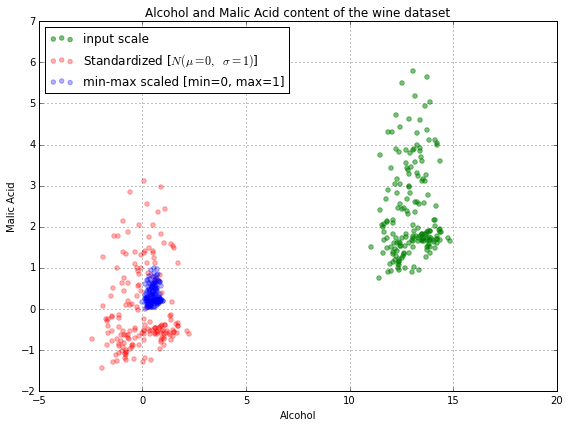

In [7]:
from matplotlib import pyplot as plt

def plot():
    plt.figure(figsize=(8,6))

    plt.scatter(df['Alcohol'], df['Malic acid'], 
            color='green', label='input scale', alpha=0.5)

    plt.scatter(df_std[:,0], df_std[:,1], color='red', 
            label='Standardized [$N  (\mu=0, \; \sigma=1)$]', alpha=0.3)

    plt.scatter(df_minmax[:,0], df_minmax[:,1], 
            color='blue', label='min-max scaled [min=0, max=1]', alpha=0.3)

    plt.title('Alcohol and Malic Acid content of the wine dataset')
    plt.xlabel('Alcohol')
    plt.ylabel('Malic Acid')
    plt.legend(loc='upper left')
    plt.grid()
    
    plt.tight_layout()

plot()
plt.show()

<br>
<br>

The plot above includes the wine datapoints on all three different scales: the input scale where the alcohol content was measured in volume-percent (green), the standardized features (red), and the normalized features (blue).
In the following plot, we will zoom in into the three different axis-scales.

<br>
<br>

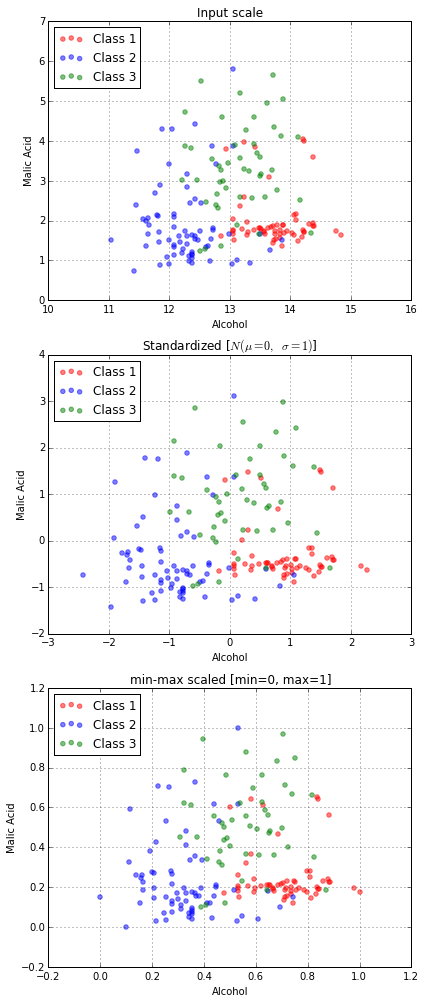

In [8]:
fig, ax = plt.subplots(3, figsize=(6,14))

for a,d,l in zip(range(len(ax)), 
               (df[['Alcohol', 'Malic acid']].values, df_std, df_minmax),
               ('Input scale', 
                'Standardized [$N  (\mu=0, \; \sigma=1)$]', 
                'min-max scaled [min=0, max=1]')
                ):
    for i,c in zip(range(1,4), ('red', 'blue', 'green')):
        ax[a].scatter(d[df['Class label'].values == i, 0], 
                  d[df['Class label'].values == i, 1],
                  alpha=0.5,
                  color=c,
                  label='Class %s' %i
                  )
    ax[a].set_title(l)
    ax[a].set_xlabel('Alcohol')
    ax[a].set_ylabel('Malic Acid')
    ax[a].legend(loc='upper left')
    ax[a].grid()
    
plt.tight_layout()

plt.show()

<br>
<br>

## The effect of standardization on PCA in a pattern classification task

Earlier, I mentioned the Principal Component Analysis (PCA) as an example where standardization is crucial, since it is "analyzing" the variances of the different features.  
Now, let us see how the standardization affects PCA and a following supervised classification on the whole wine dataset.


In the following section, we will go through the following steps:

- Reading in the dataset  
- Dividing the dataset into a separate training and test dataset  
- Standardization of the features    
- Principal Component Analysis (PCA) to reduce the dimensionality   
- Training a naive Bayes classifier  
- Evaluating the classification accuracy with and without standardization  

<br>
<br>

### Reading in the dataset

In [9]:
import pandas as pd

df = pd.io.parsers.read_csv(
    'https://raw.githubusercontent.com/rasbt/pattern_classification/master/data/wine_data.csv', 
    header=None,)

<br>
<br>

### Dividing the dataset into a separate training and test dataset

In this step, we will randomly divide the wine dataset into a training dataset and a test dataset where the training dataset will contain 70% of the samples and the test dataset will contain 30%, respectively.

In [10]:
from sklearn.cross_validation import train_test_split

X_wine = df.values[:,1:]
y_wine = df.values[:,0]

X_train, X_test, y_train, y_test = train_test_split(X_wine, y_wine,
    test_size=0.30, random_state=12345)

<br>
<br>

### Feature Scaling - Standardization

In [11]:
from sklearn import preprocessing

std_scale = preprocessing.StandardScaler().fit(X_train)
X_train_std = std_scale.transform(X_train)
X_test_std = std_scale.transform(X_test)

<br>
<br>

### Dimensionality reduction via Principal Component Analysis (PCA)

![dimension_reduction](images/dimension_reduction.png)

### Dimensionality reduction via Principal Component Analysis (PCA)

Now, we perform a PCA on the standardized and the non-standardized datasets to transform the dataset onto a 2-dimensional feature subspace.  
In a real application, a procedure like cross-validation would be done in order to find out what choice of features would yield a optimal balance between "preserving information" and "overfitting" for different classifiers. However, we will omit this step since we don't want to train a perfect classifier here, but merely compare the effects of standardization.
PCA -> Finding the directions of max variance in high dimensional data and project it onto a smaller dimensional subspace while retaining most of the information.

In [37]:
%matplotlib inline
import seaborn as sns   # Biblioteca para graficas similar a matplotlib

xplot = pd.DataFrame()
xplot['Alcohol'] = X_train[:,0]
xplot['Malic acid'] = X_train[:,1]
xplot['type'] = map(int, y_train)

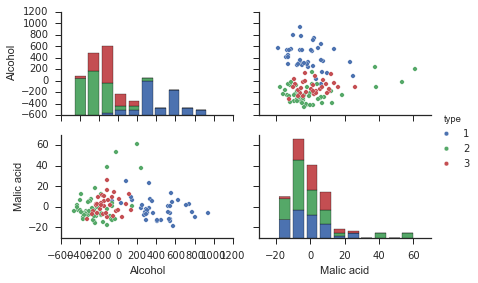

In [38]:
sns.set_style('ticks')
sns.pairplot(xplot,hue='type',vars=['Alcohol', 'Malic acid'],size=2,aspect=1.5);

In [44]:
from sklearn.decomposition import PCA

# on non-standardized data
pca = PCA(n_components=2).fit(X_train)
X_train = pca.transform(X_train)
X_test = pca.transform(X_test)

In [45]:
# om standardized data
pca_std = PCA(n_components=2).fit(X_train_std)
X_train_std = pca_std.transform(X_train_std)
X_test_std = pca_std.transform(X_test_std)

Let us quickly visualize how our new feature subspace looks like (note that class labels are not considered in a PCA - in contrast to a Linear Discriminant Analysis - but I will add them in the plot for clarity).

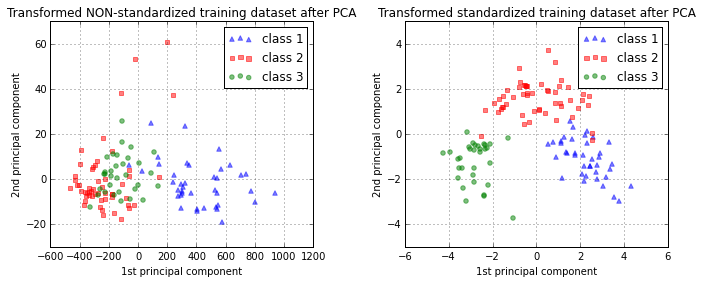

In [13]:
from matplotlib import pyplot as plt

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(10,4))


for l,c,m in zip(range(1,4), ('blue', 'red', 'green'), ('^', 's', 'o')):
    ax1.scatter(X_train[y_train==l, 0], X_train[y_train==l, 1],
        color=c, 
        label='class %s' %l, 
        alpha=0.5,
        marker=m
        )

for l,c,m in zip(range(1,4), ('blue', 'red', 'green'), ('^', 's', 'o')):
    ax2.scatter(X_train_std[y_train==l, 0], X_train_std[y_train==l, 1],
        color=c, 
        label='class %s' %l, 
        alpha=0.5,
        marker=m
        )

ax1.set_title('Transformed NON-standardized training dataset after PCA')    
ax2.set_title('Transformed standardized training dataset after PCA')    
    
for ax in (ax1, ax2):

    ax.set_xlabel('1st principal component')
    ax.set_ylabel('2nd principal component')
    ax.legend(loc='upper right')
    ax.grid()
plt.tight_layout()

plt.show()  

<br>
<br>

### Training a naive Bayes classifier

We will use a naive Bayes classifier for the classification task. If you are not familiar with it, the term "naive" comes from the assumption that all features are "independent".  
All in all, it is a simple but robust classifier based on Bayes' rule

Bayes' Rule:


\begin{equation} P(\omega_j|x) = \frac{p(x|\omega_j) * P(\omega_j)}{p(x)} \end{equation}

where 

- &omega;:  class label  
- *P(&omega;|x)*: the posterior probability
- *p(x|&omega;)*: prior probability (or likelihood)

and the **decsion rule:**

Decide $ \omega_1 $ if $ P(\omega_1|x) > P(\omega_2|x) $ else decide $ \omega_2 $.
<br>


\begin{equation}
\Rightarrow \frac{p(x|\omega_1) * P(\omega_1)}{p(x)} > \frac{p(x|\omega_2) * P(\omega_2)}{p(x)}
\end{equation} 


I don't want to get into more detail about Bayes' rule in this article, but if you are interested in a more detailed collection of examples, please have a look at the [Statistical Patter Classification](https://github.com/rasbt/pattern_classification#statistical-pattern-recognition-examples) in my pattern classification repository.



In [14]:
from sklearn.naive_bayes import GaussianNB

# on non-standardized data
gnb = GaussianNB()
fit = gnb.fit(X_train, y_train)

# on standardized data
gnb_std = GaussianNB()
fit_std = gnb_std.fit(X_train_std, y_train)

<br>
<br>

### Evaluating the classification accuracy with and without standardization

In [15]:
from sklearn import metrics

pred_train = gnb.predict(X_train)

print('\nPrediction accuracy for the training dataset')
print('{:.2%}'.format(metrics.accuracy_score(y_train, pred_train)))

pred_test = gnb.predict(X_test)

print('\nPrediction accuracy for the test dataset')
print('{:.2%}\n'.format(metrics.accuracy_score(y_test, pred_test)))


Prediction accuracy for the training dataset
81.45%

Prediction accuracy for the test dataset
64.81%



In [16]:
pred_train_std = gnb_std.predict(X_train_std)

print('\nPrediction accuracy for the training dataset')
print('{:.2%}'.format(metrics.accuracy_score(y_train, pred_train_std)))

pred_test_std = gnb_std.predict(X_test_std)

print('\nPrediction accuracy for the test dataset')
print('{:.2%}\n'.format(metrics.accuracy_score(y_test, pred_test_std)))


Prediction accuracy for the training dataset
96.77%

Prediction accuracy for the test dataset
98.15%



As we can see, the standardization prior to the PCA definitely led to an decrease in the empirical error rate on classifying samples from test dataset.